# Imports

In [57]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Regressão linear

In [50]:
# Imports

from sklearn.linear_model import LinearRegression

In [2]:
# Carrega a base de dados.

data = pd.read_csv("http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv", index_col=0)

## Análise dos dados

In [3]:
# Imprime os 10 primeiros registros.

data.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [4]:
# Extração de informacões.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
# Estatística descritiva.

data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Verificação dos nomes das colunas.

data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

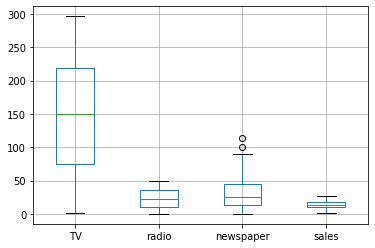

In [7]:
# Boxplot - Visualização de outliers.

boxplot = data.boxplot()

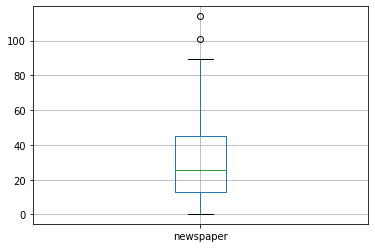

In [8]:
# Visualização da coluna com outliers.

boxplot = data.boxplot(column=["newspaper"])

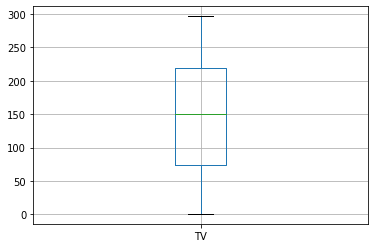

In [9]:
boxplot = data.boxplot(column=["TV"])

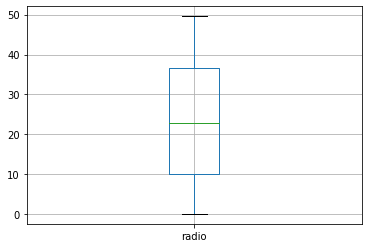

In [10]:
boxplot = data.boxplot(column=["radio"])

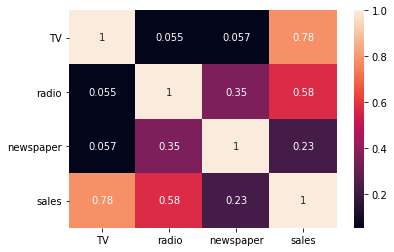

In [11]:
# Heatmap de correlação.

corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

## Treinamento

### Regressão linear simples

Modelo simples de regressão linear onde é levado em consideração somente um atributo.


In [12]:
# Carregando os dados de treinamento e os labels

feature_cols = ['TV'] # Carregando apenas os dados de TV

X = data[feature_cols] # Dados de Treinamento
y = data.sales # Labels dos dados de Treinamento

In [13]:
# Instanciando o modelo
lm = LinearRegression() 

# Treinando com os dados de treinamento
lm.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Coeficientes ou parâmetros do modelo

# Imprime beta_0 - eixo vertical
print("Valor de Beta_0: " + str(lm.intercept_))

# Imprime beta_1 - coeficiente angular da reta(declive)
# Implica em um aumento de 0.0475366404330 nas vendas.
print("Valor de Beta_1: " + str(lm.coef_[0]))

Valor de Beta_0: 7.032593549127695
Valor de Beta_1: 0.04753664043301975


In [15]:
# Faz a estimativa dos valores de quanto será vendido se gastarmos 50.000 em TV.
# y = 7.03259354913 + 0.047536640433 × 50

lm.predict([[50]])

array([9.40942557])

In [16]:
# Várias estimativas.

lm.predict([[50], [200], [10]])

array([ 9.40942557, 16.53992164,  7.50795995])

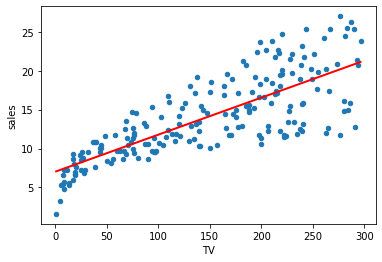

In [17]:
'''
O código a seguir faz a predição para o menor e maior valor de X na base de 
treinamento. Estes valores são utilizados para construir uma reta que é plotada 
sobre os dados de treinamento.
'''

# Cria um novo dataframe com TV como coluna e min e max como valores desssa coluna
# Menor e Maior valores de X na base de treinamento
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})

# Predição destes valores - residual sum of squares(RSS)
preds = lm.predict(X_new)

# Plotagem dos valores da base de treinamento
data.plot(kind='scatter', x='TV', y='sales') 

# Plotagem da reta
plt.plot(X_new, preds, c='red', linewidth=2) 

### Regressão linear múltipla

Ao invés de fazer a análise a partir de um único atributo, utilizamos mais de um.

In [18]:
# Carregando os dados de treinamento e os labels.

feature_cols = ['TV','radio','newspaper']

X = data[feature_cols] 
y = data.sales 

In [20]:
#Imprimindo os coeficientes encontrados

print("Valor de Beta_0: ")
print(str(lm.intercept_))

print()

print("Valores de Beta_1, Beta_2, ..., Beta_n: ")
# Junta duas tuplas e transforma em lista
print(list(zip(feature_cols, lm.coef_)))
# print(str(lm.coef_[1]))

Valor de Beta_0: 
2.938889369459412

Valores de Beta_1, Beta_2, ..., Beta_n: 
[('TV', 0.0457646454553976), ('radio', 0.18853001691820448), ('newspaper', -0.0010374930424763285)]


In [19]:
#Instanciando e treinando o modelo de regressão linear

lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Faz a estimativa dos valores de quanto será vendido se gastarmos x, x, x em TV, radio e newspaper.
# y = 0.046 × TV + 0.189 × radio + −0.001 × newspaper + 2.939 (beta_0)

lm.predict([[100, 25, 25], [200, 10, 10]])

array([12.20266701, 13.9667437 ])

### Comparando os dois modelos de regressão

In [36]:
# Carregando os dados de treinamento e os labels para o modelo de regressão linear simples

feature_cols_simple = ['TV']

X_simple = data[feature_cols_simple] # Dados de Treinamento
y_simple = data.sales # Labels dos dados de Treinamento

lm_simple = LinearRegression() # Instanciando o modelo
lm_simple.fit(X_simple, y_simple) # Treinando com os dados de treinamento

score_simple = lm_simple.score(X_simple, y_simple)

print("Score da regressão linear simples: %f " % score_simple)

# Carregando os dados de treinamento e os labels para o modelo de regressão linear múltipla

feature_cols_multiple = ['TV','radio','newspaper']

X_multiple = data[feature_cols_multiple]
y_multiple = data.sales

lm_multiple = LinearRegression()
lm_multiple.fit(X_multiple, y_multiple)

score_multiple = lm_multiple.score(X_multiple, y_multiple)

print("Score da regressão linear múltipla: %f " % score_multiple)

Score da regressão linear simples: 0.611875 
Score da regressão linear múltipla: 0.897211 
